# Question 15

Write a program to implement Laplacian operation for the input image _`f(x,y)`_ using the following operator.

```
0  1  0    1  1  1
1 -4  0    1 -8  1
0  1  0    1  1  1
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Images to process

In [2]:
path_inp = '../../images/dat/'  # path for input files
path_out_orig = 'originals/'    # path for output files: originals
path_out_conv = 'converted/'    # path for output files: converted

filenames = [
    'fu256',
    'l256',
    'n256'
]

ext_inp = '.dat'    # file extention for input
ext_out = '.bmp'    # file extention for output

#### Convert images to numpy array and store in a list of tuples as (filename, np.array)

In [3]:
# Stores the list of dictionaries for the filename, original image, converted image/s
images = []

# Iterate for all filenames
for idx, filename in enumerate(filenames):
    # Store image pixels as uint8 2D array
    image = np.array(
        [i.strip().split() for i in open(path_inp + filename + ext_inp).readlines()],
        dtype='uint8'
    )

    # Add (filename, numpy array of image) into images list
    images.append({
        'filename': filename,
        'orig': image,
        'equalized': None
    })

    # Save original image as .dat file
    np.savetxt(
        path_out_orig + ext_inp[1:] + '/' + filename + ext_inp,
        image,
        fmt=' %d',
        newline=' \n'
    )

#### Display input images



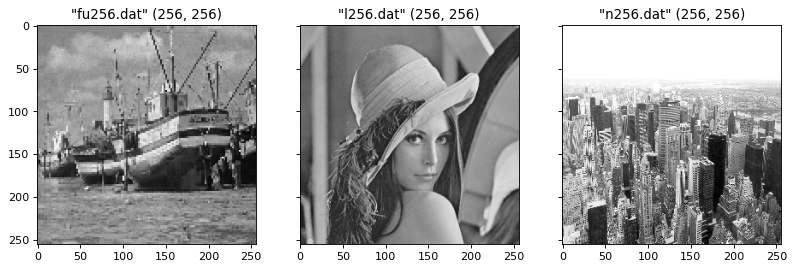

In [4]:
# Matrix dimensions
cols = 3
rows = 1

# Create figure with rows × cols subplots
fig, axs = plt.subplots(rows, cols, dpi=80, sharex=True, sharey=True)
fig.set_size_inches(4 * cols, 4.5 * rows)

# Iterate for all images
for idx, image_dict in enumerate(images):
    filename = image_dict['filename']
    image = image_dict['orig']

    # Set subplot title as '"filename" (rows, cols)' 
    axs[idx].set_title('"{}" {}'.format(
        filename + ext_inp,
        image.shape
    ))
    # Add subplot to figure plot buffer
    axs[idx].imshow(
        image,
        cmap='gray',
        vmin=0,
        vmax=255
    )

    # Save original image as .bmp file
    plt.imsave(
        path_out_orig + ext_out[1:] + '/' + filename + ext_out,
        image,
        cmap='gray',
        vmin=0,
        vmax=255
    )

# Hide x labels and tick labels for top plots and y ticks for right plots
for ax in axs.flat:
    ax.label_outer()

# Display the figure
plt.show()

## Filter Images

In [5]:
def filter_image(image, kernel):
    height, width = image.shape
    tmp = np.zeros((height + 2, width + 2))
    img = np.zeros((height, width))

    for i in range(height):
        for j in range(width):
            tmp[i + 1][j + 1] = image[i][j]

    def max(a, b):
        return a if a > b else b

    def min(a, b):
        return a if a < b else b

    for i in range(height):
        for j in range(width):
            sum = 0
            for m in [-1, 0, 1]:
                for n in [-1, 0, 1]:
                    sum += tmp[i + m][j + n] * kernel[m + 1][n + 1]
            img[i][j] = max(min(sum // 9, 255), 0)
    img.astype('uint8')
    return img

In [6]:
def get_kernel_1():
    return np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype='float32')

def get_kernel_2():
    return np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], dtype='float32')

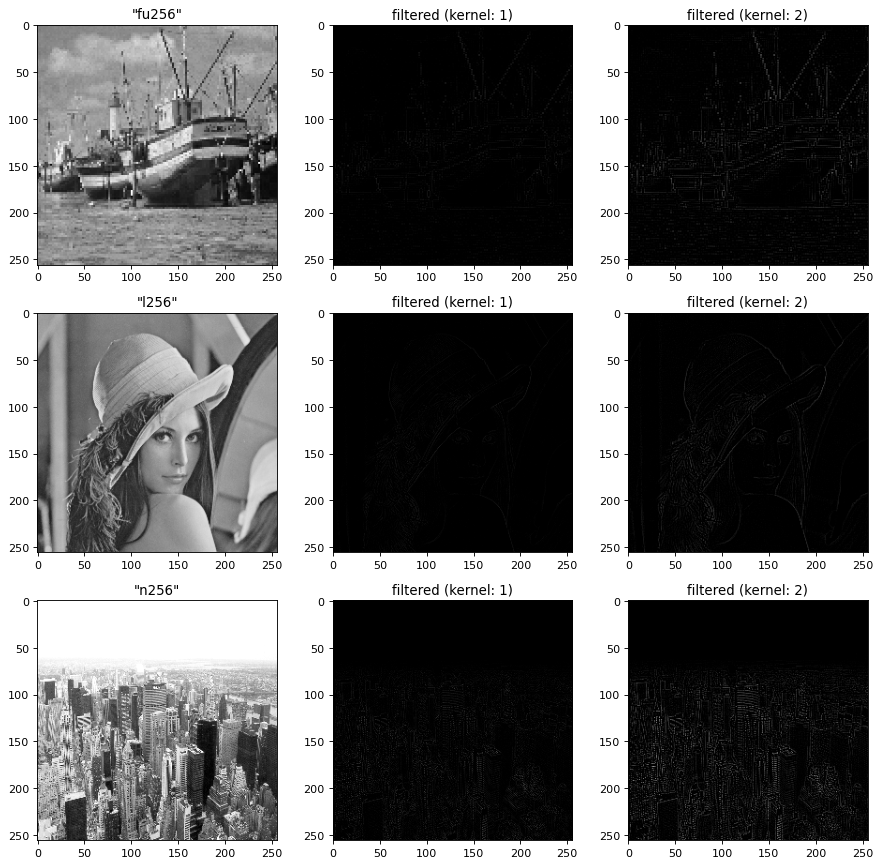

In [7]:
rows, cols = len(images), 3

# Create figure with rows × cols subplots
fig, axs = plt.subplots(rows, cols, dpi=80)
fig.set_size_inches(4.5 * cols, 4.5 * rows)

# Iterate for all images
for idx, image_dict in enumerate(images):
    filename = image_dict['filename']

    orig = image_dict['orig']

    filtered = []
    filtered.append(filter_image(orig, get_kernel_1()))
    filtered.append(filter_image(orig, get_kernel_2()))

    axs[idx, 0].set_title('"{}"'.format(filename))
    axs[idx, 0].imshow(orig, cmap='gray', vmin=0, vmax=255)
    
    for (i, item) in enumerate(filtered):
        axs[idx, i + 1].set_title(f'filtered (kernel: {i + 1})'.format(filename))
        axs[idx, i + 1].imshow(item, cmap='gray', vmin=0, vmax=255)

        # Save pixel values of original image's histogram as a 2D matrix in a .dat file
        np.savetxt(
            path_out_conv + ext_inp[1:] + '/' + filename + f'_filtered_kernel_{i + 1}' + ext_inp,
            item,
            fmt=' %d',
            newline=' \n'
        )

        # Save noisy image as .bmp file
        plt.imsave(
            path_out_conv + ext_out[1:] + '/' + filename + f'_filtered_kernel_{i + 1}' + ext_out,
            item,
            cmap='gray',
            vmin=0,
            vmax=255
        )

# Save and display the figure
plt.savefig('filtered_image.jpg')
plt.show()